In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
r = requests.get('https://listado.mercadolibre.com.ar/computadora')

In [3]:
r.status_code

200

In [4]:
r.content

b'\n<!DOCTYPE html>\n<html lang="es-AR">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.ar"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.ar"/><script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":1104.058908,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"f383fc9560b287fc"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-dat

In [5]:
r.text

'\n<!DOCTYPE html>\n<html lang="es-AR">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.ar"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.ar"/><script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":1104.058908,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"f383fc9560b287fc"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-data

In [6]:
soup = BeautifulSoup(r.content,'html.parser')

In [7]:
titulos=soup.find_all('h2',attrs={"class":"ui-search-item__title shops__item-title"})
titulos

[<h2 aria-level="3" class="ui-search-item__title shops__item-title">Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Computadora Cpu Armada Intel Core I5 8 Gb 240 Gb Ssd</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Webcam Cámara Web Full Hd Autofoco Micrófono Usb Pc Windows</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops

In [8]:
titulos= [i.text for i in titulos]
titulos


['Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)',
 'Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb',
 "Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p",
 'Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows',
 'Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb',
 'Computadora Cpu Armada Intel Core I5 8 Gb 240 Gb Ssd',
 'Webcam Cámara Web Full Hd Autofoco Micrófono Usb Pc Windows',
 'Pc Armada Intel C I3 + 8 Gb Ram Ssd 240 Gab  Kit  W10 Offic ',
 'Pc Armada Intel Core I5 8gb Ssd240 W10 Office',
 'Pc Armada Intel Core I5 1 Tb 8gb Wi Fi Kit  Soft',
 'Pc Armada Intel Core I5 8gb Ssd240 W10 Office',
 'Pc Armada Intel Core I5 8gb Ssd 480 Gab   Tec Y Mouse  W11',
 'Notebook Ssd Ryzen Computadora Portatil 15.6 Pulgadas Laptop',
 'Receptor Wifi Adaptador Antena 600mbs Pc Notebook Noga Uw04',
 'Computadora  Wifi  Home Oficce 8gb Monitor 19  Windows 10',
 'Cpu Dell 780 - 4 Gb, Disco 250 Gb + Monitor 17 ',
 'Pc Cpu Completa Hp

In [9]:
urls=soup.find_all('a',attrs={"class":"ui-search-item__group__element shops__items-group-details ui-search-link"})
urls

[<a class="ui-search-item__group__element shops__items-group-details ui-search-link" href="https://www.mercadolibre.com.ar/notebook-hp-amd-ryzen-7-5700u-12gb-256gb-ssd-156-touchscreen-tactil-windows-11-15-ef2081ms/p/MLA19569670?pdp_filters=category:MLA1648#searchVariation=MLA19569670&amp;position=1&amp;search_layout=stack&amp;type=product&amp;tracking_id=172e1a54-de8c-4b1a-9304-5fa1824bd45e" title="Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)"><h2 aria-level="3" class="ui-search-item__title shops__item-title">Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)</h2></a>,
 <a class="ui-search-item__group__element shops__items-group-details ui-search-link" href="https://www.mercadolibre.com.ar/computador-portatil-evoo-14-pulgadas-intel-4gb-64gb/p/MLA21304987?pdp_filters=category:MLA1648#searchVariation=MLA21304987&amp;position=2&amp;search_layout=stack&amp;type=product&amp;tracking_id=172e1a54-de8

In [10]:
urls[0].get('href')


'https://www.mercadolibre.com.ar/notebook-hp-amd-ryzen-7-5700u-12gb-256gb-ssd-156-touchscreen-tactil-windows-11-15-ef2081ms/p/MLA19569670?pdp_filters=category:MLA1648#searchVariation=MLA19569670&position=1&search_layout=stack&type=product&tracking_id=172e1a54-de8c-4b1a-9304-5fa1824bd45e'

In [11]:
urls=[i.get('href') for i in urls]
urls

['https://www.mercadolibre.com.ar/notebook-hp-amd-ryzen-7-5700u-12gb-256gb-ssd-156-touchscreen-tactil-windows-11-15-ef2081ms/p/MLA19569670?pdp_filters=category:MLA1648#searchVariation=MLA19569670&position=1&search_layout=stack&type=product&tracking_id=172e1a54-de8c-4b1a-9304-5fa1824bd45e',
 'https://www.mercadolibre.com.ar/computador-portatil-evoo-14-pulgadas-intel-4gb-64gb/p/MLA21304987?pdp_filters=category:MLA1648#searchVariation=MLA21304987&position=2&search_layout=stack&type=product&tracking_id=172e1a54-de8c-4b1a-9304-5fa1824bd45e',
 'https://articulo.mercadolibre.com.ar/MLA-1124661616-notebook-hp-450g8-156-i7-1165g7-8gb-ram-256gb-ssd-w10p-_JM#position=13&search_layout=stack&type=item&tracking_id=172e1a54-de8c-4b1a-9304-5fa1824bd45e',
 'https://www.mercadolibre.com.ar/computadoras-notebook-laptop-baratas-ssd-256gb-6gb-windows/p/MLA21215096?pdp_filters=category:MLA1648#searchVariation=MLA21215096&position=3&search_layout=stack&type=product&tracking_id=172e1a54-de8c-4b1a-9304-5fa1824

In [12]:
#//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]

In [13]:
dom= etree.HTML(str(soup))
precios=dom.xpath('//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]')
precios[0].text

'789.999'

In [14]:
precios=[i.text for i in precios]
precios


['789.999',
 '264.999',
 '1.573.218',
 '249.999',
 '198.998',
 '199.990',
 '2.199',
 '169.999',
 '194.999',
 '269.999',
 '194.999',
 '199.999',
 '729.266',
 '4.620',
 '139.000',
 '90.700',
 '189.990',
 '85.600',
 '273.999',
 '2.099',
 '419.999',
 '39.899',
 '289.990',
 '4.199',
 '2.999',
 '10.499',
 '189.990',
 '229.000',
 '129.400',
 '2.299',
 '235.000',
 '1.239',
 '3.999',
 '1.800',
 '11.699',
 '168.700',
 '279.990',
 '282.999',
 '229.990',
 '6.799',
 '169.990',
 '8.870',
 '7.999',
 '1.599',
 '1.699',
 '129.999',
 '16.184',
 '279.999',
 '2.099',
 '1.050.000',
 '4.799',
 '1.810',
 '3.347',
 '1.899']

In [15]:
df=pd.DataFrame({'titulo':titulos,'url':urls,'precio':precios})
df


,titulo,url,precio
0,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789.999
1,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264.999
2,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1.573.218
3,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249.999
4,Pc Cpu Computadora Intel Core I5 16gb Ram Ssd ...,https://articulo.mercadolibre.com.ar/MLA-13725...,198.998
5,Computadora Cpu Armada Intel Core I5 8 Gb 240 ...,https://articulo.mercadolibre.com.ar/MLA-86096...,199.990
6,Webcam Cámara Web Full Hd Autofoco Micrófono U...,https://www.mercadolibre.com.ar/webcam-camara-...,2.199
7,Pc Armada Intel C I3 + 8 Gb Ram Ssd 240 Gab K...,https://articulo.mercadolibre.com.ar/MLA-93012...,169.999
8,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://click1.mercadolibre.com.ar/mclics/clic...,194.999
9,Pc Armada Intel Core I5 1 Tb 8gb Wi Fi Kit Soft,https://click1.mercadolibre.com.ar/mclics/clic...,269.999


In [16]:
df.to_csv('computadores_mercado_libre.csv')

In [17]:
#//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]

In [18]:
dom= etree.HTML(str(soup))
siguiente=dom.xpath('//li[@class="andes-pagination__button andes-pagination__button--next shops__pagination-button"]//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]')[0].get('href')
siguiente


'https://listado.mercadolibre.com.ar/computacion/computadora_Desde_51_NoIndex_True'

In [19]:
ini= soup.find('span',attrs={'class':'andes-pagination__link'})
ini=int(ini.text)
ini

1

In [20]:
# //li[@class="andes-pagination__page-count"]

In [21]:
can= soup.find('li',attrs={'class':'andes-pagination__page-count'})
can=int(can.text.split(sep=" ",maxsplit=1)[1])
can

40

In [22]:
lista_titulos=[]
lista_urls=[]
lista_precios=[]


In [23]:
lista_titulos=[]
lista_urls=[]
lista_precios=[]
siguiente='https://listado.mercadolibre.com.ar/computadora'
while True:
  r= requests.get(siguiente)
  if r.status_code ==200:
    soup=BeautifulSoup(r.content,'html.parser')
    #Titulos
    titulos=soup.find_all('h2',attrs={"class":"ui-search-item__title shops__item-title"})
    titulos= [i.text for i in titulos]
    lista_titulos.extend(titulos)
    #Urls
    urls=soup.find_all('a',attrs={"class":"ui-search-item__group__element shops__items-group-details ui-search-link"})
    urls=[i.get('href') for i in urls]
    lista_urls.extend(urls)
    #Precios
    dom= etree.HTML(str(soup))
    precios=dom.xpath('//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]')
    precios=[i.text for i in precios]
    lista_precios.extend(precios)
    ini= soup.find('span',attrs={'class':'andes-pagination__link'})
    ini=int(ini.text)
    can= soup.find('li',attrs={'class':'andes-pagination__page-count'})
    can=int(can.text.split(sep=" ",maxsplit=1)[1])




  else:
    break
  print(ini,can,siguiente)

  if ini==can:
    break
  siguiente=dom.xpath('//li[@class="andes-pagination__button andes-pagination__button--next shops__pagination-button"]//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]')[0].get('href')

1 40 https://listado.mercadolibre.com.ar/computadora
2 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_51_NoIndex_True
3 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_101_NoIndex_True
4 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_151_NoIndex_True
5 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_201_NoIndex_True
6 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_251_NoIndex_True
7 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_301_NoIndex_True
8 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_351_NoIndex_True
9 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_401_NoIndex_True
10 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_451_NoIndex_True
11 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_501_NoIndex_True
12 40 https://listado.mercadolibre.com.ar/computacion/computadora_

In [24]:
print(len(lista_titulos))
print(len(lista_urls))
print(len(lista_precios))



2209
2209
2209


In [25]:
df=pd.DataFrame({'titulo':lista_titulos,'url':lista_urls,'precio':lista_precios})
df


,titulo,url,precio
0,Mouse inalámbrico Logitech M170 rojo y negro,https://www.mercadolibre.com.ar/mouse-inalambr...,8.799
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789.999
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419.999
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264.999
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343.806
...,...,...,...
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72.829
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,https://www.mercadolibre.com.ar/teclado-gamer-...,4.999
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,https://articulo.mercadolibre.com.ar/MLA-11269...,9.899
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,https://www.mercadolibre.com.ar/teclado-blueto...,34.990


In [26]:
df.shape

(2209, 3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titulo  2209 non-null   object
 1   url     2209 non-null   object
 2   precio  2209 non-null   object
dtypes: object(3)
memory usage: 51.9+ KB


In [28]:
df['precio'] = df['precio'].str.replace('.', '').apply(float)

<ipython-input-28-77b41d39d7f3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['precio'] = df['precio'].str.replace('.', '').apply(float)


In [29]:
df.dtypes


titulo     object
url        object
precio    float64
dtype: object

In [81]:
(np.min(df['precio']), np.quantile(df['precio'],0.25),np.median(df['precio']),np.quantile(df['precio'],0.75),np.max(df['precio']))

(330.0, 5782.0, 23799.0, 239999.0, 2184113.0)

In [30]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
precio,2209.0,155953.211408,242778.187735,330.0,5782.0,23799.0,239999.0,2184113.0


In [85]:
#Estimamos la asimetria pero antes sacamos las variables tipo object
df.drop(['titulo','url'],axis=1).skew()

precio       2.364681
titulo_id    0.194985
dtype: float64

In [86]:
#Estimamos la curtosis
df.drop(['titulo','url'],axis=1).kurt()

precio       8.087476
titulo_id   -1.240023
dtype: float64

In [31]:
df.isna().sum()

titulo    0
url       0
precio    0
dtype: int64

In [32]:

df.duplicated().sum()

0

In [33]:
df.dropna(inplace=True)


In [95]:
#Eliminamos las filas con nulos en la column 'text'
df.dropna(subset='precio',inplace=True)


In [34]:
df.titulo.nunique()

1818

In [84]:
df.titulo.unique()

array(['Mouse inalámbrico Logitech  M170 rojo y negro',
       'Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)',
       'Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ram 16gb Ssd 480',
       ..., 'Pasta Termica Arctic Mx-4 Grasa Siliconada Alto Rendimiento',
       'Teclado Bluetooth Logitech K380 Color Sand Espa√±ol Circuit Color Del Teclado Beige',
       'Mini Parlantes Pc Multimedia Melody Miniplug Usb'], dtype=object)

In [35]:
df=df.drop_duplicates()
df.head(5)

,titulo,url,precio
0,Mouse inalámbrico Logitech M170 rojo y negro,https://www.mercadolibre.com.ar/mouse-inalambr...,8799.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0


In [36]:
df.loc[df['precio']>10000]

,titulo,url,precio
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
...,...,...,...
2196,Disipador Doble Para Ssd M.2 Ngff Nvme 2280 El...,https://articulo.mercadolibre.com.ar/MLA-11023...,14999.0
2197,AMD Asus Dual Radeon 6700 Series RX 6700 XT DU...,https://www.mercadolibre.com.ar/amd-asus-dual-...,499999.0
2202,Mouse Inal√°mbrico Para Macbook iPad Notebook ...,https://articulo.mercadolibre.com.ar/MLA-11018...,17990.0
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72829.0


In [37]:
df[df.precio>10000]

,titulo,url,precio
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
...,...,...,...
2196,Disipador Doble Para Ssd M.2 Ngff Nvme 2280 El...,https://articulo.mercadolibre.com.ar/MLA-11023...,14999.0
2197,AMD Asus Dual Radeon 6700 Series RX 6700 XT DU...,https://www.mercadolibre.com.ar/amd-asus-dual-...,499999.0
2202,Mouse Inal√°mbrico Para Macbook iPad Notebook ...,https://articulo.mercadolibre.com.ar/MLA-11018...,17990.0
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72829.0


In [38]:
df.loc[(df['precio']>=200000)&(df['precio']<=500000)]

,titulo,url,precio
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
8,Computadora Pc Cpu Solarmax Intel Core I3 12va...,https://click1.mercadolibre.com.ar/mclics/clic...,386490.0
...,...,...,...
2174,Tableta gr√°fica Wacom One DTC133W0A black y ...,https://www.mercadolibre.com.ar/tableta-grafic...,499999.0
2175,Pc Lenovo Thinkcentre I3 240ssd 8gb Ram + Dvd ...,https://articulo.mercadolibre.com.ar/MLA-14597...,228222.0
2177,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,429999.0
2179,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0


In [39]:
df.loc[(df['precio']>=500000)|(df['precio']<=200000)]

,titulo,url,precio
0,Mouse inalámbrico Logitech M170 rojo y negro,https://www.mercadolibre.com.ar/mouse-inalambr...,8799.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
6,Pc Armada Dual Core Amd 8gb Ssd 240gb Wifi Hdm...,https://articulo.mercadolibre.com.ar/MLA-90346...,169990.0
7,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
9,Soporte Notebook Base Eleva Aluminio Computado...,https://click1.mercadolibre.com.ar/mclics/clic...,8870.0
...,...,...,...
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72829.0
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,https://www.mercadolibre.com.ar/teclado-gamer-...,4999.0
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,https://articulo.mercadolibre.com.ar/MLA-11269...,9899.0
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,https://www.mercadolibre.com.ar/teclado-blueto...,34990.0


In [40]:
df.query('`precio`==4990')['titulo'][:2].to_list()

['Capturadora Video Easier Easy Cap S-video Rca  P/vhs Wid-mac',
 'Mousepad L (60x28,5cm) Anime Cod:023 - Evangelion']

In [41]:
df.query('`precio`>200000')

,titulo,url,precio
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
...,...,...,...
2174,Tableta gr√°fica Wacom One DTC133W0A black y ...,https://www.mercadolibre.com.ar/tableta-grafic...,499999.0
2175,Pc Lenovo Thinkcentre I3 240ssd 8gb Ram + Dvd ...,https://articulo.mercadolibre.com.ar/MLA-14597...,228222.0
2177,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,429999.0
2179,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0


In [42]:
df[['titulo','precio']]

,titulo,precio
0,Mouse inalámbrico Logitech M170 rojo y negro,8799.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,789999.0
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,343806.0
...,...,...
2204,Glorious Model O - Glossy white,72829.0
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,4999.0
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,9899.0
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,34990.0


In [43]:
df.filter(['titulo','precio'])


,titulo,precio
0,Mouse inalámbrico Logitech M170 rojo y negro,8799.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,789999.0
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,343806.0
...,...,...
2204,Glorious Model O - Glossy white,72829.0
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,4999.0
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,9899.0
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,34990.0


In [44]:
df.loc[df.titulo.str.contains('mouse',case= False, na=False)]

,titulo,url,precio
0,Mouse inalámbrico Logitech M170 rojo y negro,https://www.mercadolibre.com.ar/mouse-inalambr...,8799.0
22,Pc Armada Intel Core I5 8gb Ssd 480 Gab Tec ...,https://articulo.mercadolibre.com.ar/MLA-12969...,199999.0
110,Kit Teclado Mouse Inalambrico Usb Pila Tablet ...,https://www.mercadolibre.com.ar/kit-teclado-mo...,11699.0
111,Pc Armada I7 16 Gigas Ssd 240 Gab Wi Fi Teclad...,https://articulo.mercadolibre.com.ar/MLA-11165...,369999.0
129,Microsoft Mobile Souris Wireless Mobile Mouse ...,https://www.mercadolibre.com.ar/microsoft-mobi...,7989.0
...,...,...,...
2189,Mouse Black Point A20 Con Cable Usb Negro,https://www.mercadolibre.com.ar/mouse-black-po...,995.0
2198,Mouse Verbatim Wired Usb 1000 Dpi 99728,https://www.mercadolibre.com.ar/mouse-verbatim...,3999.0
2201,Mouse Pad Gamer T-dagger Geometry T-tmp301 De ...,https://www.mercadolibre.com.ar/mouse-pad-game...,6299.0
2202,Mouse Inal√°mbrico Para Macbook iPad Notebook ...,https://articulo.mercadolibre.com.ar/MLA-11018...,17990.0


In [45]:
df.loc[~df.titulo.str.contains('mouse',case= False, na=False)] #case es para que sea insensible a las mayusculas y minusculas

,titulo,url,precio
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
...,...,...,...
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72829.0
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,https://www.mercadolibre.com.ar/teclado-gamer-...,4999.0
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,https://articulo.mercadolibre.com.ar/MLA-11269...,9899.0
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,https://www.mercadolibre.com.ar/teclado-blueto...,34990.0


In [46]:
df.loc[df.titulo.str.contains('mouse',case= False, na=False),['precio']]

,precio
0,8799.0
22,199999.0
110,11699.0
111,369999.0
129,7989.0
...,...
2189,995.0
2198,3999.0
2201,6299.0
2202,17990.0


In [47]:
df.groupby('titulo').count().sort_values(by='precio',ascending=False)

,url,precio
titulo,,
Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd,14,14
Soporte Notebook Base Eleva Aluminio Computadora Home Office,13,13
"Caddy Segundo Disco Notebook Hdd Sata O Ssd Universal 9,5mm",10,10
Adaptador Wifi Usb Pc Receptor Realtek Antena 2.4ghz 802.11n,10,10
Adaptador Carry Case Para Disco Ssd M.2 Nvme - Usb 3.1 Usb-c,10,10
...,...,...
Gabinete Gamer Atx Xigmatek Duke X3 Fan Led Vidrio Templado,1,1
Gabinete Gamer Armor Deluxe Edition 8 Coolers Rgb Atx,1,1
Funda Teclado Macbook Pro Retina M1 Y M2 Pro 2022,1,1


In [48]:
df.groupby('titulo').count().sort_values(by='precio',ascending=False).index

Index(['Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd',
       'Soporte Notebook Base Eleva Aluminio Computadora Home Office',
       'Caddy Segundo Disco Notebook Hdd Sata O Ssd Universal 9,5mm',
       'Adaptador Wifi Usb Pc Receptor Realtek Antena 2.4ghz 802.11n',
       'Adaptador Carry Case Para Disco Ssd M.2 Nvme - Usb 3.1 Usb-c',
       'Cable Vga Monitor Doble Filtro Macho Macho Proyector Lcd Pc',
       'Funda Estuche Portatil Para Disco Rigido Externo',
       'Kit Cepilllo Para Limpiar Teclado Y Auriculares 5 En 1  ',
       'Soplador Aire Multiuso 15000mah Inalambrico Bateria Con Luz',
       'Capturadora Digital De Video Hdmi 4k - 2k Con Sistema Loop',
       ...
       'Gabinete Multimedia Sentey G28 ',
       'Gabinete Kit Pc Fuente 500w Con Parlantes Nuevos Oferta',
       'Gabinete Gamer Xigmatek Gaming X 6 Fanes Argb Controladora',
       'Gabinete Gamer Cougar Dust 2 Desert Stand Mini-itx ',
       'Gabinete Gamer Blanco Ruix White Ventana Lateral Oferta

In [49]:
df.groupby('titulo').count()['precio']


titulo
 APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro            2
 APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro           2
 APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro          1
 APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro            1
 Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron                   1
                                                                       ..
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades                  2
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro    1
Xiaomi Mi Headphones Basic HSER02JY - Plateado                          2
Xtrike Me GM-216 - Negro                                                1
iMac 24 M1 8cpu 8gpu 512gb - Rosa                                       1
Name: precio, Length: 1818, dtype: int64

In [50]:
df.groupby('titulo').count()['precio'].reset_index().set_index('titulo')

,precio
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,2
APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,2
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,1
APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,1
Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,1
...,...
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,2
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,1
Xiaomi Mi Headphones Basic HSER02JY - Plateado,2


In [51]:
df.groupby('titulo').agg({'url':'count','precio':'sum'}).sort_values(by='url',ascending=False)

,url,precio
titulo,,
Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd,14,5567668.0
Soporte Notebook Base Eleva Aluminio Computadora Home Office,13,115310.0
"Caddy Segundo Disco Notebook Hdd Sata O Ssd Universal 9,5mm",10,33990.0
Adaptador Wifi Usb Pc Receptor Realtek Antena 2.4ghz 802.11n,10,43990.0
Adaptador Carry Case Para Disco Ssd M.2 Nvme - Usb 3.1 Usb-c,10,149990.0
...,...,...
Gabinete Gamer Atx Xigmatek Duke X3 Fan Led Vidrio Templado,1,43469.0
Gabinete Gamer Armor Deluxe Edition 8 Coolers Rgb Atx,1,53119.0
Funda Teclado Macbook Pro Retina M1 Y M2 Pro 2022,1,4800.0


In [52]:
#df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [53]:
#today_date=dt.datetime(2011,12,11)



In [54]:
df1=df.groupby('titulo').agg({'precio':[lambda x:(x.max()-x.mean())] })
df1


,precio
,<lambda>
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,13750.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,0.0
Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,0.0
...,...
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,0.0
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,0.0


In [55]:
df1.columns=df1.columns.droplevel(0)
df1

,<lambda>
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,13750.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,0.0
Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,0.0
...,...
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,0.0
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,0.0
Xiaomi Mi Headphones Basic HSER02JY - Plateado,0.0


In [56]:
df1.columns=['difprecio']
df1

,difprecio
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,13750.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,0.0
Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,0.0
...,...
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,0.0
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,0.0
Xiaomi Mi Headphones Basic HSER02JY - Plateado,0.0


In [57]:
df.groupby('titulo').agg(['sum','count','mean','max','min'])

<ipython-input-57-a5153addb88a>:1: FutureWarning: ['url'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('titulo').agg(['sum','count','mean','max','min'])


precio        \
                                                          sum count   
titulo                                                                
 APC Back-UPS BR900G-AR 900VA entrada y salida ...   308676.0     2   
 APC Back-UPS BX550CI-AR 550VA entrada y salida...   176498.0     2   
 APC Easy UPS BV1000I-AR 1000VA entrada y salid...   109900.0     1   
 APC Easy UPS BV500I-AR 500VA entrada y salida ...    57499.0     1   
 Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 ...     2055.0     1   
...                                                       ...   ...   
Wypall X75 Regular Roll Plus Power Pocket X 6 U...    66000.0     2   
Xiaomi Mi Dual mode wireless mouse silent editi...    17999.0     1   
Xiaomi Mi Headphones Basic HSER02JY - Plateado         9998.0     2   
Xtrike Me GM-216 - Negro                               3024.0     1   
iMac 24 M1 8cpu 8gpu 512gb - Rosa                   2143999.0     1   

                                                                          \
                                                         mean        max   
titulo                                                                     
 APC Back-UPS BR900G-AR 900VA entrada y salida ...   154338.0   154338.0   
 APC Back-UPS BX550CI-AR 550VA entrada y salida...    88249.0   101999.0   
 APC Easy UPS BV1000I-AR 1000VA entrada y salid...   109900.0   109900.0   
 APC Easy UPS BV500I-AR 500VA entrada y salida ...    57499.0    57499.0   
 Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 ...     2055.0     2055.0   
...                                                       ...        ...   
Wypall X75 Regular Roll Plus Power Pocket X 6 U...    33000.0    33000.0   
Xiaomi Mi Dual mode wireless mouse silent editi...    17999.0    17999.0   
Xiaomi Mi Headphones Basic HSER02JY - Plateado         4999.0     4999.0   
Xtrike Me GM-216 - Negro                               3024.0     3024.0   
iMac 24 M1 8cpu 8gpu 512gb - Rosa                   2143999.0  2143999.0   

                                                               
                                                          min  
titulo                                                         
 APC Back-UPS BR900G-AR 900VA entrada y salida ...   154338.0  
 APC Back-UPS BX550CI-AR 550VA entrada y salida...    74499.0  
 APC Easy UPS BV1000I-AR 1000VA entrada y salid...   109900.0  
 APC Easy UPS BV500I-AR 500VA entrada y salida ...    57499.0  
 Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 ...     2055.0  
...                                                       ...  
Wypall X75 Regular Roll Plus Power Pocket X 6 U...    33000.0  
Xiaomi Mi Dual mode wireless mouse silent editi...    17999.0  
Xiaomi Mi Headphones Basic HSER02JY - Plateado         4999.0  
Xtrike Me GM-216 - Negro                               3024.0  
iMac 24 M1 8cpu 8gpu 512gb - Rosa                   2143999.0  

[1818 rows x 5 columns]

In [58]:

df['Mouse'] = np.where(df['titulo'].str.contains('mouse', case=False, na=False), 'mouse', 'otros')
df

,titulo,url,precio,Mouse
0,Mouse inalámbrico Logitech M170 rojo y negro,https://www.mercadolibre.com.ar/mouse-inalambr...,8799.0,mouse
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0,otros
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0,otros
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0,otros
...,...,...,...,...
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72829.0,otros
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,https://www.mercadolibre.com.ar/teclado-gamer-...,4999.0,otros
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,https://articulo.mercadolibre.com.ar/MLA-11269...,9899.0,otros
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,https://www.mercadolibre.com.ar/teclado-blueto...,34990.0,otros


In [59]:
df.loc[df['Mouse'].isin(['otros'])]

,titulo,url,precio,Mouse
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0,otros
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0,otros
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0,otros
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0,otros
...,...,...,...,...
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72829.0,otros
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,https://www.mercadolibre.com.ar/teclado-gamer-...,4999.0,otros
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,https://articulo.mercadolibre.com.ar/MLA-11269...,9899.0,otros
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,https://www.mercadolibre.com.ar/teclado-blueto...,34990.0,otros


In [60]:
df = df.drop('Mouse', axis=1)
#df.drop(columns =["Mouse"],inplace=True)
#df.drop('Mouse',axis=1,inplace=True)
#df_penguins.pop('Mouse')
df

,titulo,url,precio
0,Mouse inalámbrico Logitech M170 rojo y negro,https://www.mercadolibre.com.ar/mouse-inalambr...,8799.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0
...,...,...,...
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72829.0
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,https://www.mercadolibre.com.ar/teclado-gamer-...,4999.0
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,https://articulo.mercadolibre.com.ar/MLA-11269...,9899.0
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,https://www.mercadolibre.com.ar/teclado-blueto...,34990.0


In [61]:
#BALANCEADO DE DATASET
#frauds = df.loc[df['Class'] == 1]
#no_frauds = df.drop(index = frauds.index)
#no_frauds = no_frauds.sample(n = 492)
#balanced = pd.concat([no_frauds, frauds])
#balanced['Class'].value_counts()

In [62]:
#MATRIZ DE CORRELACION

#fig, ax = plt.subplots(figsize=(20,20))
#corr= balanced.corr()
#sns.heatmap(corr,ax=ax,annot=True,cmap='BrBG',fmt='.2f',linewidths=0.5,vmin=-1,vmax=1)

In [63]:
#SPLIT
#location=df_users['Location'].str.split(',',n=2,expand=True)

#TODO EN MAYUSCULA E ELIMINA LOS ESPACIOS EN BLANCO
#df_users['City']=location[0].str.upper().str.strip()

In [64]:
#MERGE
#df_books_rating = df_books.merge(df_rating,on='ISBN')

In [94]:
#Juntar tablas
#df_concat=pd.concat([df,df2],axis=0)
#df_concat

In [ ]:
#Codifica los labels y lo aplica a la colummna
#codificacion_manual= {"Male":1,"Female":2}
#df_banco["Gender"]=df_banco["Gender"].map(codificacion_manual)

#Otra forma

#df['sentiment']=df['sentiment'].map(dict(positive=1,negative=0))

In [ ]:
#Aplicamos un shuffle al dataset
#df = df.sample(frac=1).reset_index(drop=True)
#df

In [ ]:
 # Junta los elementos de la lista en un solo texto y luego lo agregar a la lista corpus
 #tweet_list_stopwords=[i for i in tweet_list_lemma if i not in stopwords_list]

 #   tweet= ' '.join(tweet_list_stopwords)

    #Agrego el tweet ya preprocesado a la lista

  #  corpus.append(tweet)

In [65]:
df_pivot=df.pivot_table(columns='titulo',index='url',values='precio')
df_pivot

titulo,APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,Computadora Pc Dell Cpu Dual Core 4 Gb Ram Office Windows10,Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,Pc Lenovo Cpu Intel I3 4gb Ram Oficina Estudio,84 Keycaps Pbt Double Shot Teclado Mecanico 60%,AMD ASRock Challenger Radeon 6600 Series RX 6600 XT RX6600XT CLD 8GO OC Edition - 8 GB,...,Webcam Cámara Web Hd Microfono Usb Pc Windows Mac Zoom Color Negro,Webcam C√°mara Web Usb 1080 Full Hd Plug&play Sin Instalaci√≥n,Webcam Soul Xw100 Hd 1280x720 Con Microfono,Wesdar WD1080 - Negro,Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,Xiaomi Mi Headphones Basic HSER02JY - Plateado,Xtrike Me GM-216 - Negro,iMac 24 M1 8cpu 8gpu 512gb - Rosa
url,,,,,,,,,,,,,,,,,,,,,
https://articulo.mercadolibre.com.ar/MLA-1100072039-pc-intel-core-i5-10400-h410-8gb-ddr4-ssd-240gb-gab-kit-_JM#position=47&search_layout=stack&type=item&tracking_id=12e8bcf6-8753-4ef3-ae25-018ffb2e68c6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100113681-adaptador-usb-c-hub-macbook-air-pro-memoria-4k-hdmi-8-en-1-_JM#position=51&search_layout=stack&type=item&tracking_id=7290452a-e918-43d2-b3a5-ff6904cca945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100176136-cable-usb-30-a-micro-b-15m-pc-disco-rigido-externo-vention-_JM#position=30&search_layout=stack&type=item&tracking_id=7f542163-ca1d-4165-bb30-f40d0d2b5b48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100176136-cable-usb-30-a-micro-b-15m-pc-disco-rigido-externo-vention-_JM#position=54&search_layout=stack&type=item&tracking_id=7290452a-e918-43d2-b3a5-ff6904cca945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100522188-pc-gamer-armada-amd-ryzen-5-5600g-8gb-ssd-240gb-radeon-vega-_JM#position=56&search_layout=stack&type=item&tracking_id=0a0456e3-d7c0-446a-8c33-b72f4844c086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.mercadolibre.com.ar/western-digital-wd-elements-portable-wdbuzg0010bbk-1-tb-negro/p/MLA6326753?pdp_filters=category:MLA1648#searchVariation=MLA6326753&position=12&search_layout=stack&type=product&tracking_id=2dd6438c-39a1-4346-8091-ea3758cb948e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,55499.0,NaN,NaN,NaN,NaN,NaN
https://www.mercadolibre.com.ar/xiaomi-mi-dual-mode-wireless-mouse-silent-edition-wxsmsbmw02-negro/p/MLA16244423?pdp_filters=category:MLA1648#searchVariation=MLA16244423&position=5&search_layout=stack&type=product&tracking_id=c6a25bac-fee9-49eb-a19b-adf3bc1b73b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17999.0,NaN,NaN,NaN
https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=10&search_layout=stack&type=product&tracking_id=f7ce36e3-064a-49ab-a495-3689ac1b64ee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4999.0,NaN,NaN


In [66]:
df_pivot.fillna(0,inplace=True)
df_pivot

titulo,APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,Computadora Pc Dell Cpu Dual Core 4 Gb Ram Office Windows10,Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,Pc Lenovo Cpu Intel I3 4gb Ram Oficina Estudio,84 Keycaps Pbt Double Shot Teclado Mecanico 60%,AMD ASRock Challenger Radeon 6600 Series RX 6600 XT RX6600XT CLD 8GO OC Edition - 8 GB,...,Webcam Cámara Web Hd Microfono Usb Pc Windows Mac Zoom Color Negro,Webcam C√°mara Web Usb 1080 Full Hd Plug&play Sin Instalaci√≥n,Webcam Soul Xw100 Hd 1280x720 Con Microfono,Wesdar WD1080 - Negro,Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,Xiaomi Mi Headphones Basic HSER02JY - Plateado,Xtrike Me GM-216 - Negro,iMac 24 M1 8cpu 8gpu 512gb - Rosa
url,,,,,,,,,,,,,,,,,,,,,
https://articulo.mercadolibre.com.ar/MLA-1100072039-pc-intel-core-i5-10400-h410-8gb-ddr4-ssd-240gb-gab-kit-_JM#position=47&search_layout=stack&type=item&tracking_id=12e8bcf6-8753-4ef3-ae25-018ffb2e68c6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100113681-adaptador-usb-c-hub-macbook-air-pro-memoria-4k-hdmi-8-en-1-_JM#position=51&search_layout=stack&type=item&tracking_id=7290452a-e918-43d2-b3a5-ff6904cca945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100176136-cable-usb-30-a-micro-b-15m-pc-disco-rigido-externo-vention-_JM#position=30&search_layout=stack&type=item&tracking_id=7f542163-ca1d-4165-bb30-f40d0d2b5b48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100176136-cable-usb-30-a-micro-b-15m-pc-disco-rigido-externo-vention-_JM#position=54&search_layout=stack&type=item&tracking_id=7290452a-e918-43d2-b3a5-ff6904cca945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100522188-pc-gamer-armada-amd-ryzen-5-5600g-8gb-ssd-240gb-radeon-vega-_JM#position=56&search_layout=stack&type=item&tracking_id=0a0456e3-d7c0-446a-8c33-b72f4844c086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.mercadolibre.com.ar/western-digital-wd-elements-portable-wdbuzg0010bbk-1-tb-negro/p/MLA6326753?pdp_filters=category:MLA1648#searchVariation=MLA6326753&position=12&search_layout=stack&type=product&tracking_id=2dd6438c-39a1-4346-8091-ea3758cb948e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,55499.0,0.0,0.0,0.0,0.0,0.0
https://www.mercadolibre.com.ar/xiaomi-mi-dual-mode-wireless-mouse-silent-edition-wxsmsbmw02-negro/p/MLA16244423?pdp_filters=category:MLA1648#searchVariation=MLA16244423&position=5&search_layout=stack&type=product&tracking_id=c6a25bac-fee9-49eb-a19b-adf3bc1b73b2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17999.0,0.0,0.0,0.0
https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=10&search_layout=stack&type=product&tracking_id=f7ce36e3-064a-49ab-a495-3689ac1b64ee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4999.0,0.0,0.0


In [67]:
df['titulo_id']=pd.factorize(df['titulo'])[0]+1
df

,titulo,url,precio,titulo_id
0,Mouse inalámbrico Logitech M170 rojo y negro,https://www.mercadolibre.com.ar/mouse-inalambr...,8799.0,1
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0,2
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0,3
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,4
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0,5
...,...,...,...,...
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...,72829.0,1814
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,https://www.mercadolibre.com.ar/teclado-gamer-...,4999.0,1815
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,https://articulo.mercadolibre.com.ar/MLA-11269...,9899.0,1816
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,https://www.mercadolibre.com.ar/teclado-blueto...,34990.0,1817


In [68]:
mapping=df.set_index('titulo_id')['titulo'].to_dict()
mapping

{1: 'Mouse inalámbrico Logitech  M170 rojo y negro',
 2: 'Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)',
 3: 'Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ram 16gb Ssd 480',
 4: 'Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb',
 5: 'Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wifi + Bluetooth',
 6: 'Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows',
 7: 'Pc Armada Dual Core Amd 8gb Ssd 240gb Wifi Hdmi 550w Haedo',
 8: "Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p",
 9: 'Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd',
 10: 'Soporte Notebook Base Eleva Aluminio Computadora Home Office',
 11: 'Disco sólido interno Kingston SA400S37/480G 480GB negro',
 12: 'Pc Armada Intel Core I5 8gb Ssd240 W10 Office',
 13: 'Disco sólido interno Kingston SA400S37/240G 240GB negro',
 14: 'Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb',
 15: 'Cpu Dell 780 - 4 Gb, Disco 250 Gb + Monitor 17 ',
 16: 'Computadora Cpu

In [69]:
#Eliminamos duplicados con set y despues lo volvemos a convertir en una lista
#users=list(set(uids))

In [70]:
df.select_dtypes('number')

,precio,titulo_id
0,8799.0,1
1,789999.0,2
2,419999.0,3
3,264999.0,4
4,343806.0,5
...,...,...
2204,72829.0,1814
2205,4999.0,1815
2206,9899.0,1816
2207,34990.0,1817


In [71]:
df.select_dtypes('object')

,titulo,url
0,Mouse inalámbrico Logitech M170 rojo y negro,https://www.mercadolibre.com.ar/mouse-inalambr...
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...
...,...,...
2204,Glorious Model O - Glossy white,https://www.mercadolibre.com.ar/glorious-model...
2205,Teclado Gamer Retroiluminado Rgb Panter Gk202,https://www.mercadolibre.com.ar/teclado-gamer-...
2206,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...,https://articulo.mercadolibre.com.ar/MLA-11269...
2207,Teclado Bluetooth Logitech K380 Color Sand Esp...,https://www.mercadolibre.com.ar/teclado-blueto...


In [72]:

df.columns

Index(['titulo', 'url', 'precio', 'titulo_id'], dtype='object')

In [73]:
df.columns.to_list()

['titulo', 'url', 'precio', 'titulo_id']

<ipython-input-74-b3d43b504795>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

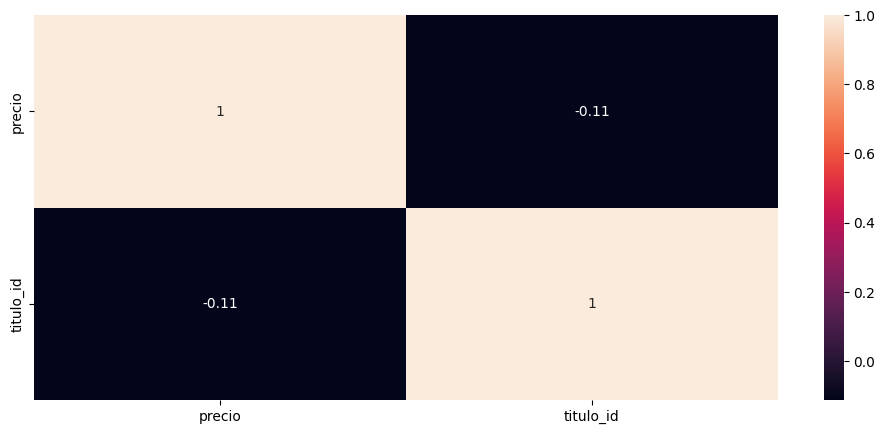

In [74]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [75]:
df.drop(df.loc[(df["precio"]>500000) | (df["precio"]<200000)].index) #No puse inplace entonces no lo reemplaza

,titulo,url,precio,titulo_id
2,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0,3
3,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,4
4,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...,https://articulo.mercadolibre.com.ar/MLA-92957...,343806.0,5
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0,6
8,Computadora Pc Cpu Solarmax Intel Core I3 12va...,https://click1.mercadolibre.com.ar/mclics/clic...,386490.0,9
...,...,...,...,...
2174,Tableta gr√°fica Wacom One DTC133W0A black y ...,https://www.mercadolibre.com.ar/tableta-grafic...,499999.0,1785
2175,Pc Lenovo Thinkcentre I3 240ssd 8gb Ram + Dvd ...,https://articulo.mercadolibre.com.ar/MLA-14597...,228222.0,1786
2177,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,429999.0,1788
2179,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0,1790


In [76]:
df[(df['precio']<500000)&(df['precio']>200000)&(df['titulo_id']<80)&(df['titulo_id']>30)]





,titulo,url,precio,titulo_id
30,Pc Armada Intel Core I7 1 Tb 16g Wi Fi Geforce...,https://articulo.mercadolibre.com.ar/MLA-90028...,345999.0,31
35,Pc Armada Gamer Ryzen5 5600g 16gb Ram 480ssd M...,https://articulo.mercadolibre.com.ar/MLA-11927...,420999.0,36
36,Pc Ar Completa Core I5 8gb Ssd240 Led 20 Wi F...,https://articulo.mercadolibre.com.ar/MLA-11053...,282999.0,37
39,Pc Armada Intel Core I7 1 Tb 16gb De Ram Grafi...,https://articulo.mercadolibre.com.ar/MLA-11200...,279999.0,40
44,Computadora Cpu Armada Intel Core I7 16 Gb 480...,https://articulo.mercadolibre.com.ar/MLA-11750...,304990.0,45
50,Pc Cpu Computadora Intel Core I5 16gb Ram Ssd ...,https://articulo.mercadolibre.com.ar/MLA-12892...,219998.0,51
56,Pc Armada Intel Core I5 1 Tb 8gb Wi Fi Kit Soft,https://articulo.mercadolibre.com.ar/MLA-72637...,269999.0,57
66,Pc Ar Intel Core I7 1t 16gb Ram Graficos Hd Nu...,https://articulo.mercadolibre.com.ar/MLA-64328...,279999.0,65
68,Pc Armada Intel C I3 + 8 Gb Ssd 240 Wi Fi Nue...,https://articulo.mercadolibre.com.ar/MLA-88517...,239999.0,67
73,Pc Armada Intel Core I5 1tb 8gb Ram Graficos H...,https://articulo.mercadolibre.com.ar/MLA-80143...,264999.0,72


In [77]:
df_dummies=pd.get_dummies(df,dtype=float) # convierte variables categoricas en numericas

df_dummies

,precio,titulo_id,titulo_ APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,titulo_ APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,titulo_ APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,titulo_ APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,titulo_ Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,titulo_ Computadora Pc Dell Cpu Dual Core 4 Gb Ram Office Windows10,titulo_ Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,titulo_ Pc Lenovo Cpu Intel I3 4gb Ram Oficina Estudio,...,url_https://www.mercadolibre.com.ar/webcam-camara-web-hd-microfono-usb-pc-windows-mac-zoom-color-negro/p/MLA24410534?pdp_filters=category:MLA1648#searchVariation=MLA24410534&position=3&search_layout=stack&type=product&tracking_id=0a0456e3-d7c0-446a-8c33-b72f4844c086,url_https://www.mercadolibre.com.ar/webcam-camara-web-para-pc-full-hd-1080p-con-microfono-noga-e-color-negro/p/MLA19770865?pdp_filters=category:MLA1648#searchVariation=MLA19770865&position=8&search_layout=stack&type=product&tracking_id=b5ea7af2-cca9-4daf-af3b-6fca25ebeb23,url_https://www.mercadolibre.com.ar/webcam-cover-spyslide-tapa-camara-de-notebook-celu-no-hacker/p/MLA20040758?pdp_filters=category:MLA1648#searchVariation=MLA20040758&position=11&search_layout=stack&type=product&tracking_id=0a0456e3-d7c0-446a-8c33-b72f4844c086,url_https://www.mercadolibre.com.ar/webcam-soul-xw100-hd-1280x720-con-microfono/p/MLA19717399?pdp_filters=category:MLA1648#searchVariation=MLA19717399&position=7&search_layout=stack&type=product&tracking_id=c54566f6-f6cf-491a-9c06-fcdeabe87767,url_https://www.mercadolibre.com.ar/wesdar-wd1080-negro/p/MLA18397803?pdp_filters=category:MLA1648#searchVariation=MLA18397803&position=20&search_layout=stack&type=product&tracking_id=3181f32f-35ac-41c6-a06b-5368b2f9d221,url_https://www.mercadolibre.com.ar/western-digital-wd-elements-portable-wdbuzg0010bbk-1-tb-negro/p/MLA6326753?pdp_filters=category:MLA1648#searchVariation=MLA6326753&position=12&search_layout=stack&type=product&tracking_id=2dd6438c-39a1-4346-8091-ea3758cb948e,url_https://www.mercadolibre.com.ar/xiaomi-mi-dual-mode-wireless-mouse-silent-edition-wxsmsbmw02-negro/p/MLA16244423?pdp_filters=category:MLA1648#searchVariation=MLA16244423&position=5&search_layout=stack&type=product&tracking_id=c6a25bac-fee9-49eb-a19b-adf3bc1b73b2,url_https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=10&search_layout=stack&type=product&tracking_id=f7ce36e3-064a-49ab-a495-3689ac1b64ee,url_https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=6&search_layout=stack&type=product&tracking_id=8bcd50b1-5c8a-4323-93aa-4c91c6f01711,url_https://www.mercadolibre.com.ar/xtrike-me-gm-216-negro/p/MLA16050081?pdp_filters=category:MLA1648#searchVariation=MLA16050081&position=21&search_layout=stack&type=product&tracking_id=7290452a-e918-43d2-b3a5-ff6904cca945
0,8799.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,789999.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,419999.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,264999.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,343806.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,72829.0,1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2205,4999.0,1815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2206,9899.0,1816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2207,34990.0,1817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
tabla_frecuencia= pd.crosstab(df['precio'],df['titulo']) #se hace una tablacruzada que cuenta la cantidad de coincidencias de las dos columnas analizadas
tabla_frecuencia

titulo,APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,Computadora Pc Dell Cpu Dual Core 4 Gb Ram Office Windows10,Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,Pc Lenovo Cpu Intel I3 4gb Ram Oficina Estudio,84 Keycaps Pbt Double Shot Teclado Mecanico 60%,AMD ASRock Challenger Radeon 6600 Series RX 6600 XT RX6600XT CLD 8GO OC Edition - 8 GB,...,Webcam Cámara Web Hd Microfono Usb Pc Windows Mac Zoom Color Negro,Webcam C√°mara Web Usb 1080 Full Hd Plug&play Sin Instalaci√≥n,Webcam Soul Xw100 Hd 1280x720 Con Microfono,Wesdar WD1080 - Negro,Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,Xiaomi Mi Headphones Basic HSER02JY - Plateado,Xtrike Me GM-216 - Negro,iMac 24 M1 8cpu 8gpu 512gb - Rosa
precio,,,,,,,,,,,,,,,,,,,,,
330.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479198.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1499999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573218.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
nuevas_columnas = ["precio", "url", "titulo"] # Cambia el orden de las columnas
df_nuevascolumnas = df[nuevas_columnas]
df_nuevascolumnas

,precio,url,titulo
0,8799.0,https://www.mercadolibre.com.ar/mouse-inalambr...,Mouse inalámbrico Logitech M170 rojo y negro
1,789999.0,https://www.mercadolibre.com.ar/notebook-hp-am...,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...
2,419999.0,https://articulo.mercadolibre.com.ar/MLA-93229...,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...
3,264999.0,https://www.mercadolibre.com.ar/computador-por...,Computador Portátil Evoo 14 Pulgadas Intel 4gb...
4,343806.0,https://articulo.mercadolibre.com.ar/MLA-92957...,Pc Gamer Amd Ryzen 3 3200g 8gb Ddr4 240 Ssd Wi...
...,...,...,...
2204,72829.0,https://www.mercadolibre.com.ar/glorious-model...,Glorious Model O - Glossy white
2205,4999.0,https://www.mercadolibre.com.ar/teclado-gamer-...,Teclado Gamer Retroiluminado Rgb Panter Gk202
2206,9899.0,https://articulo.mercadolibre.com.ar/MLA-11269...,Pasta Termica Arctic Mx-4 Grasa Siliconada Alt...
2207,34990.0,https://www.mercadolibre.com.ar/teclado-blueto...,Teclado Bluetooth Logitech K380 Color Sand Esp...


In [93]:
#Cambiar el nombre de las columnas
#df.rename(columns={'is_recommended':'label','review_text':'text'},inplace=True)

Text(20000, 60, 'Promedio: precio    19525.981203\ndtype: float64')

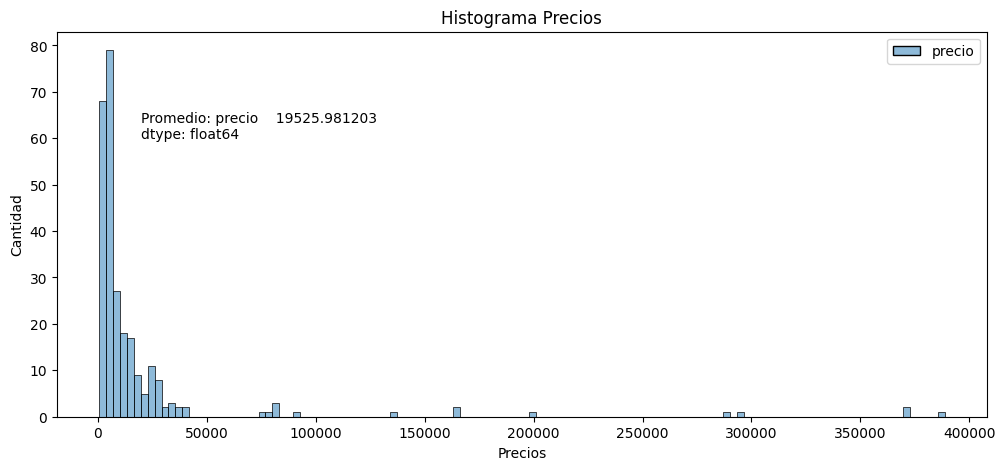

In [78]:
df_precios=df.loc[df.titulo.str.contains('mouse',case= False, na=False),['precio']]

fig,ax=plt.subplots(figsize=(12,5))

sns.histplot(df_precios)
ax.set_title('Histograma Precios')
ax.set_xlabel('Precios')
ax.set_ylabel('Cantidad')
ax.text(20000,60,f"Promedio: {df_precios.mean()}")

<Axes: xlabel='titulo', ylabel='count'>

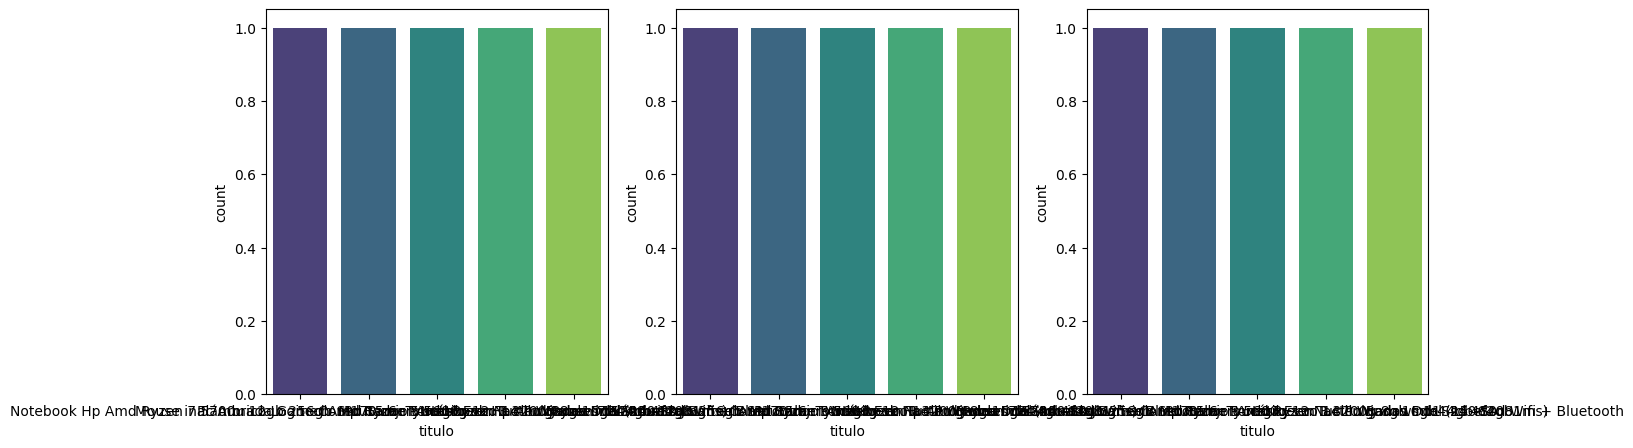

In [80]:
fig= plt.figure(figsize=(15,5))

ax1=plt.subplot(1,3,1)
sns.countplot(data=df,x=df['titulo'].head(5),palette='viridis')

ax2=plt.subplot(1,3,2,sharey=ax1)
sns.countplot(data=df,x=df['titulo'].head(5),palette='viridis')


ax3=plt.subplot(1,3,3,sharey=ax1)
sns.countplot(data=df,x=df['titulo'].head(5),palette='viridis')

<ipython-input-87-0e6cd59c56b6>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0=plt.subplot2grid((1,3),(0,0))


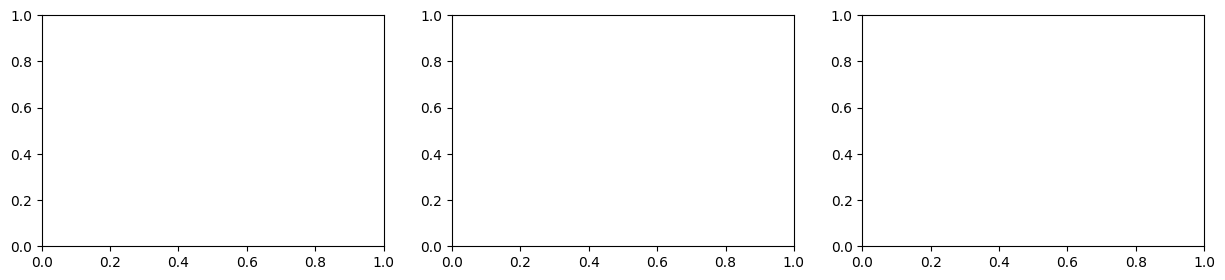

In [87]:
fig, ax= plt.subplots(figsize=(15,3))

ax0=plt.subplot2grid((1,3),(0,0))


ax1=plt.subplot2grid((1,3),(0,1))



ax2=plt.subplot2grid((1,3),(0,2))


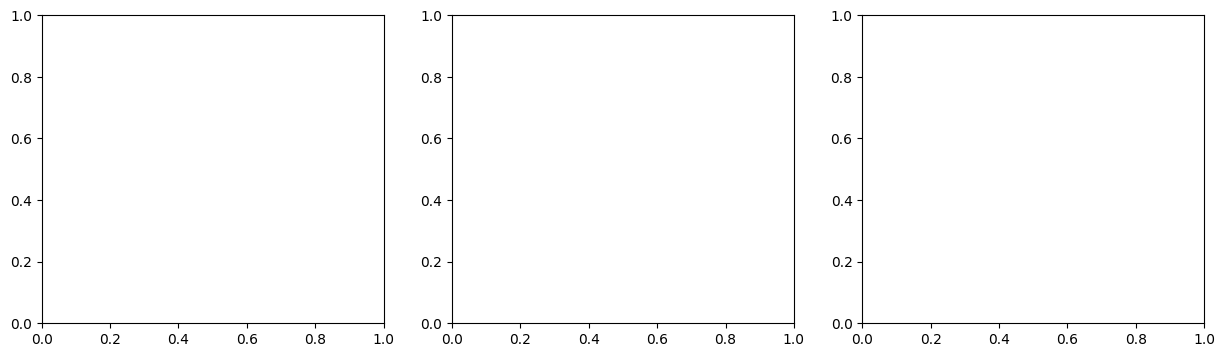

In [91]:
fig, ax=plt.subplots(nrows=1,ncols=3, figsize=(15,4),sharex=True)

#sns.countplot(data=df.head(10),x='year',hue='sex',ax=ax[0])

#sns.countplot(data=df.head(10),x='year',hue='rangoedad',ax=ax[1])

#sns.countplot(data=df.head(10),x='year',hue='categoria',ax=ax[2])

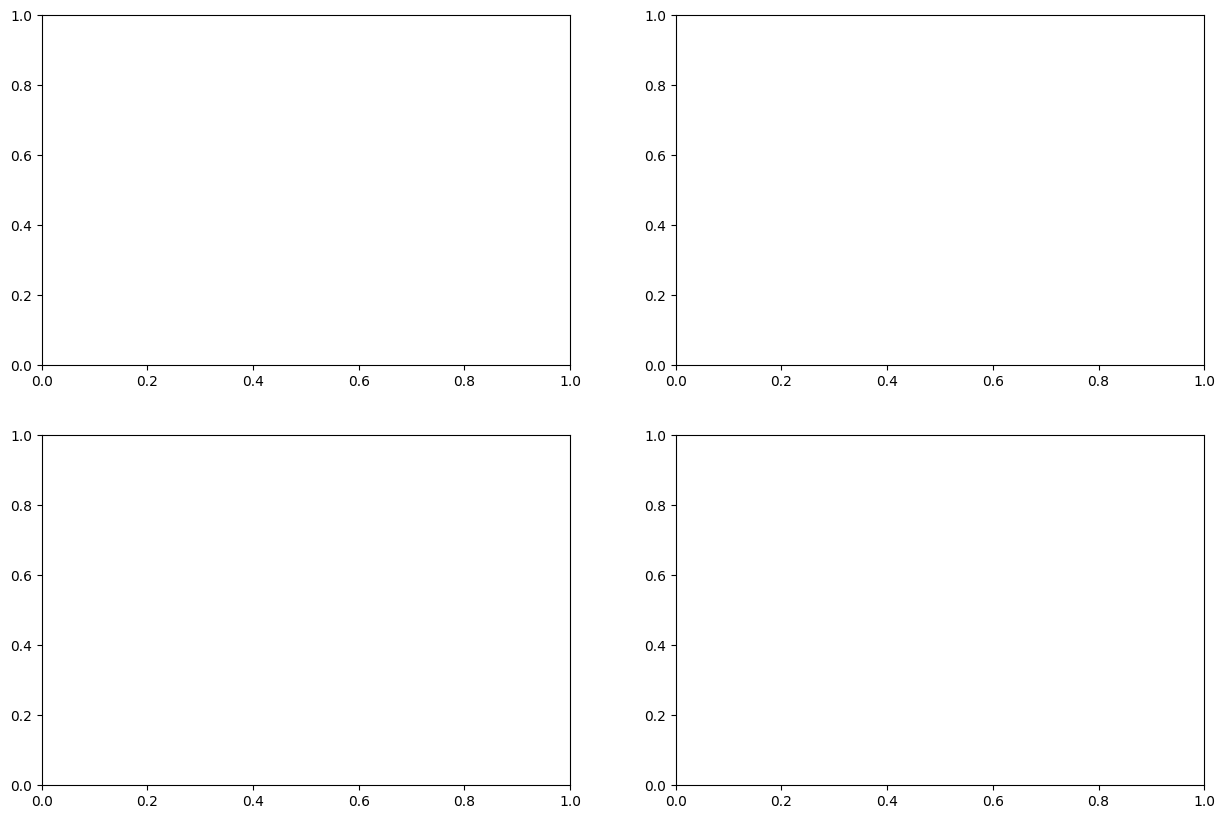

In [92]:
#Graficos superpuestos
fig, ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10),sharex=False )


#sns.histplot(data=df_adelie,x=df_adelie[var],ax=ax[0,0],label='Adelie')

#sns.histplot(data=df_gentoo,x=var,ax=ax[0,0],label='Gentoo')

#sns.histplot(data=df_chinstrap,x=var,ax=ax[0,0],label='Chinstrap')

#Curva de densidad

#sns.kdeplot(data=df_adelie,x=var,ax=ax[0,1],label='Adelie',fill=True)

#sns.kdeplot(data=df_gentoo,x=var,ax=ax[0,1],label='Gentoo',fill=True)

#sns.kdeplot(data=df_chinstrap,x=var,ax=ax[0,1],label='Chinstrap',fill=True)
